In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
x, y = sklearn.datasets.make_moons(200, noise = 0.2)

In [3]:
x

array([[ 8.91552540e-02, -7.40083688e-01],
       [ 5.17506563e-01, -1.55818385e-01],
       [-8.55950188e-01, -4.86560421e-02],
       [-3.68308676e-01,  8.81377870e-01],
       [ 7.33029410e-01,  5.62858315e-01],
       [-8.68590044e-01,  5.46727761e-01],
       [ 2.07756286e+00, -2.90955769e-01],
       [-8.43704934e-01,  6.43715749e-01],
       [ 1.64774918e+00, -3.97272649e-01],
       [ 2.32524903e+00,  5.15585782e-01],
       [-8.32548337e-01,  1.12638735e+00],
       [ 4.52674967e-01, -2.46274294e-01],
       [ 1.19940602e-01,  5.97821579e-01],
       [-1.82917565e-01,  8.39812163e-01],
       [ 9.85164493e-01,  6.50179477e-01],
       [ 1.81483175e+00, -4.12043675e-01],
       [-1.15662831e+00, -2.65648801e-01],
       [-1.62637872e-01,  9.12759847e-01],
       [ 2.56985447e-01,  9.24091967e-01],
       [ 2.58896060e-01, -3.78957899e-01],
       [ 2.69250655e-01,  3.21031266e-01],
       [ 8.36936001e-01,  4.85429871e-01],
       [ 1.04473077e+00,  3.33904687e-02],
       [ 1.

In [4]:
y

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1])

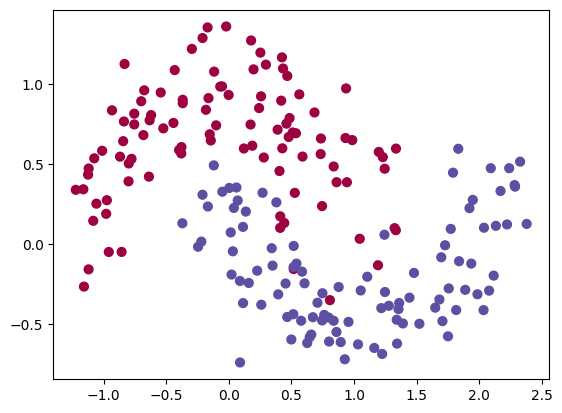

In [5]:
plt.scatter(x[:,0], x[:,1], s=40, c = y, cmap = plt.cm.Spectral)
plt.show()

In [6]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [7]:
class FeedForward(torch.nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)

    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x

In [9]:
network = FeedForward(2, 50, 2)
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02)
loss_function = torch.nn.CrossEntropyLoss()

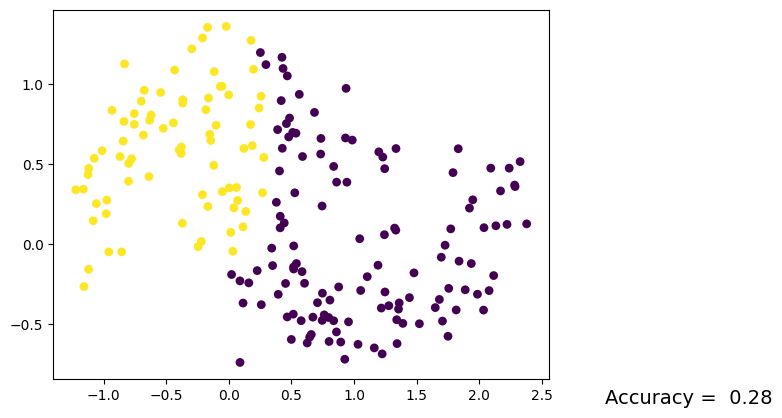

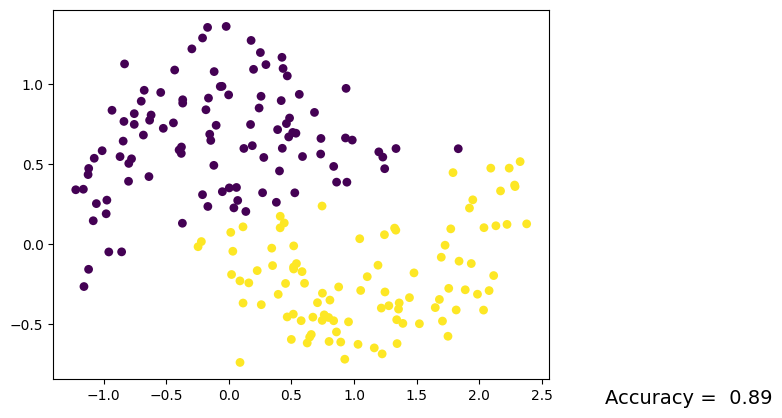

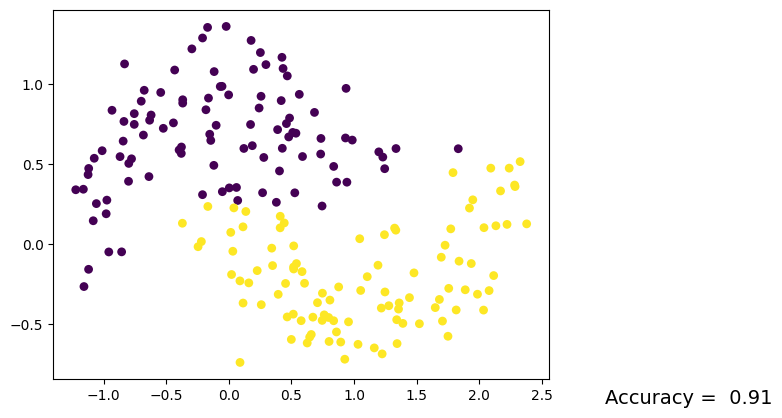

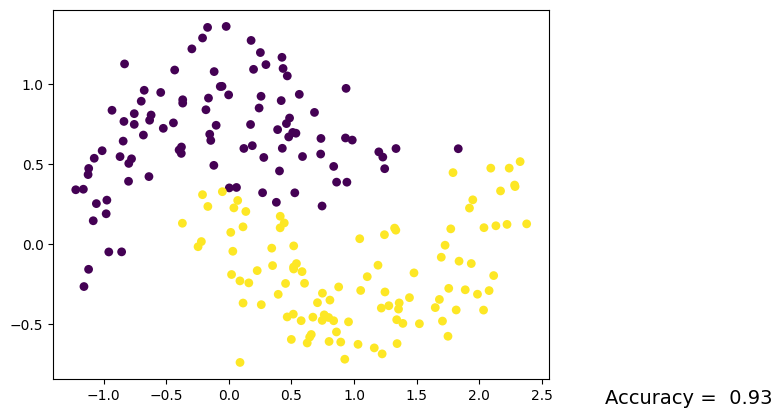

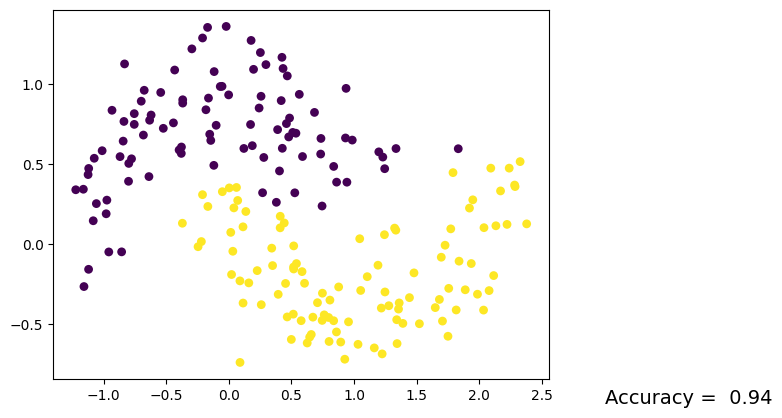

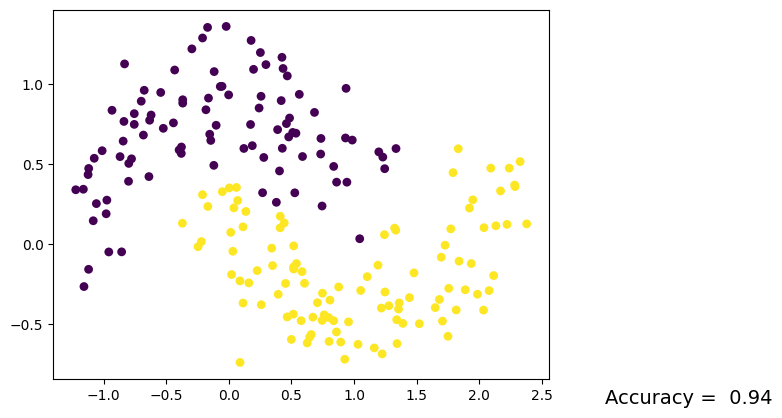

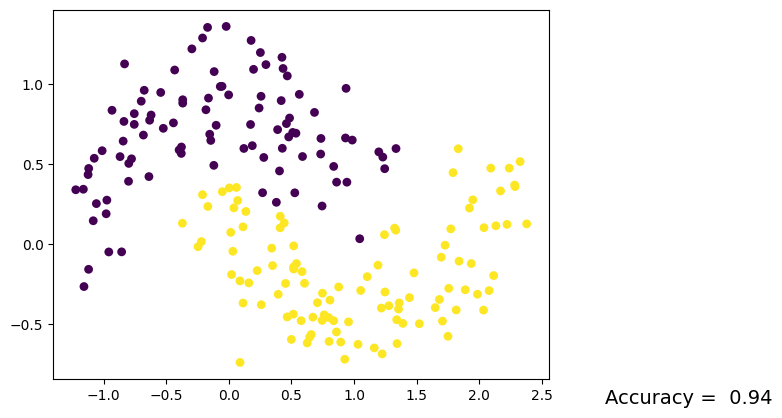

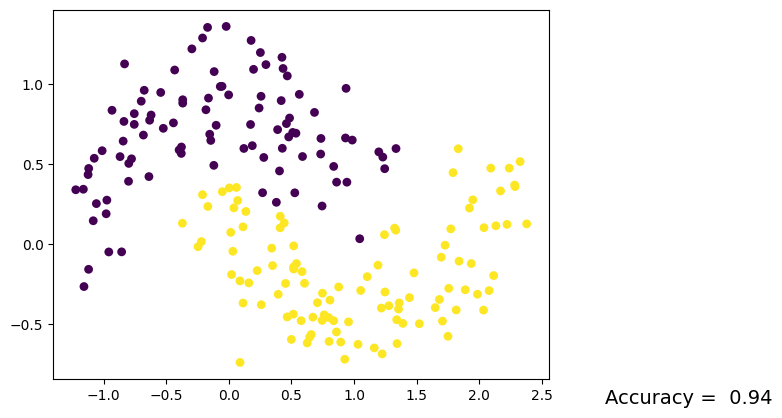

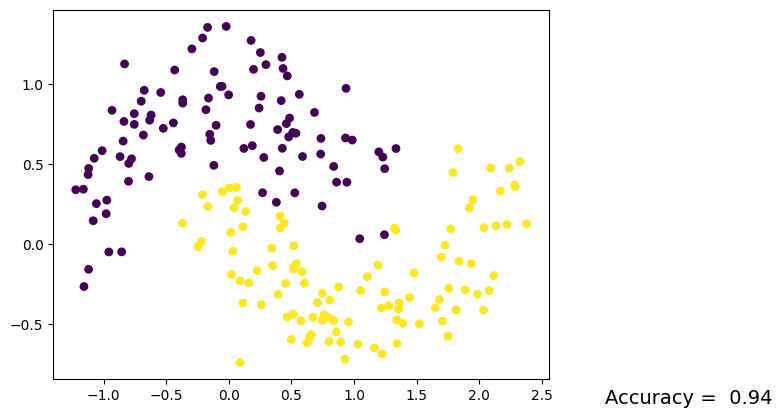

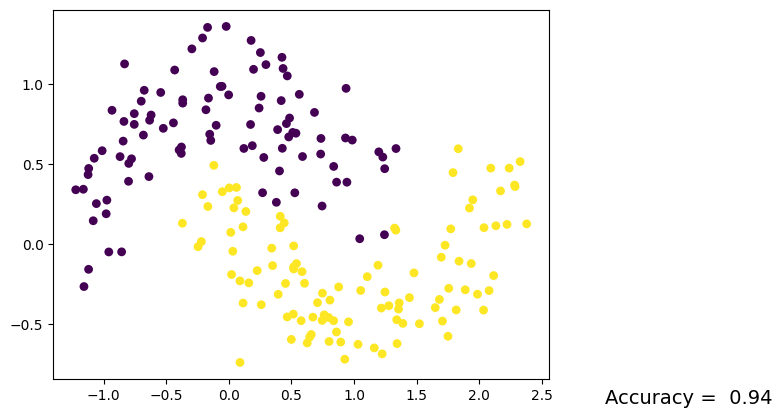

In [11]:
plt.ion()
for epoch in range(10000):
    out = network(x)
    loss = loss_function(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        max_value, prediction = torch.max(out, 1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], s = 40, c= predicted_y, lw = 0)
        accuracy = (predicted_y == target_y).mean()
        plt.text(3, -1, 'Accuracy = {: .2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)

plt.ioff()
plt.show()